<a href="https://colab.research.google.com/github/SubhikshaKarna/Deep_Learning_MNIST_DataSet/blob/main/Neural_Network_MNIST_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
from keras.datasets import mnist

In [10]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [11]:
type(train_images)

numpy.ndarray

In [12]:
train_images.dtype

dtype('uint8')

In [13]:
train_images.ndim

3

In [15]:
train_images.shape

(60000, 28, 28)

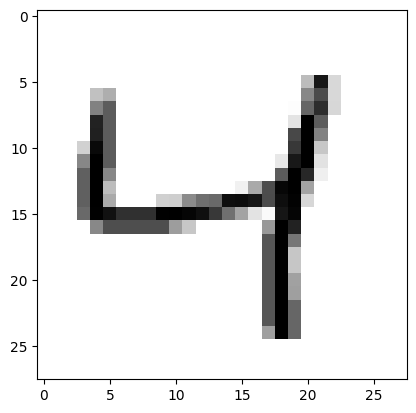

In [16]:
import matplotlib.pyplot as plt
plt.imshow(train_images[2,:,:],cmap=plt.cm.binary)
plt.show()

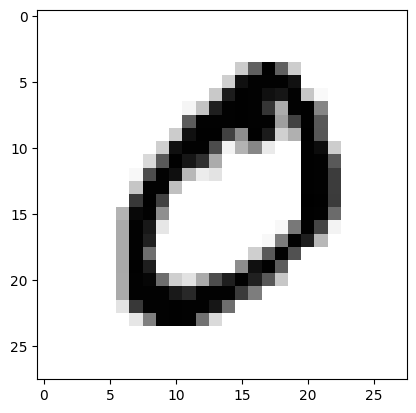

In [17]:
import matplotlib.pyplot as plt
plt.imshow(train_images[1,:,:],cmap=plt.cm.binary)
plt.show()

In [18]:
type(train_labels)

numpy.ndarray

In [19]:
train_labels.shape

(60000,)

In [20]:
train_labels[1]

0

In [21]:
train_labels[2]

4

In [22]:
type(test_images)

numpy.ndarray

In [23]:
test_images.shape

(10000, 28, 28)

In [24]:
type(test_labels)

numpy.ndarray

In [25]:
test_labels.shape

(10000,)

In [26]:
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype("float32")/255

In [27]:
test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype("float32")/255

In [28]:
train_images.shape

(60000, 784)

In [29]:
from keras.utils import to_categorical
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [30]:
from keras import models
from keras import layers

In [32]:
model=models.Sequential()

In [33]:
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [37]:
model.fit(train_images,
          train_labels,
          epochs=5,
          batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0281 - accuracy: 0.9914
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0212 - accuracy: 0.9936
Epoch 3/5
469/469 [==============================] - 8s 18ms/step - loss: 0.0167 - accuracy: 0.9957
Epoch 4/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0119 - accuracy: 0.9972
Epoch 5/5
469/469 [==============================] - 10s 22ms/step - loss: 0.0092 - accuracy: 0.9977


In [38]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print("test_loss: ",test_loss,"\ntest_acc:",test_acc)

313/313 [==============================] - 2s 3ms/step - loss: 0.0573 - accuracy: 0.9844
test_loss:  0.05732695385813713 
test_acc: 0.9843999743461609
